In [179]:
import pandas as pd

In [180]:
df = pd.read_csv('crime_data.csv')
print(len(df))
df.drop(columns=["Unnamed: 0"], inplace=True)
df = df.replace(to_replace=r"AM", value="", regex=True)
df = df.replace(to_replace=r"PM", value="", regex=True)
df["Time_of_Incident"] = df["Time_of_Incident"].apply(pd.to_datetime, errors="coerce")
df["Time_of_report"] = df["Time_of_report"].apply(pd.to_datetime, errors="coerce")
df["Time_of_Incident"] = df["Time_of_Incident"].apply(pd.to_datetime, errors="coerce")
df = df.dropna()
print(len(df))

1794
1794


In [181]:
df['month_year'] = df['Time_of_report'].dt.to_period('M')

In [182]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Top 20 Incidents'}, xlabel='Count', ylabel='Incident'>

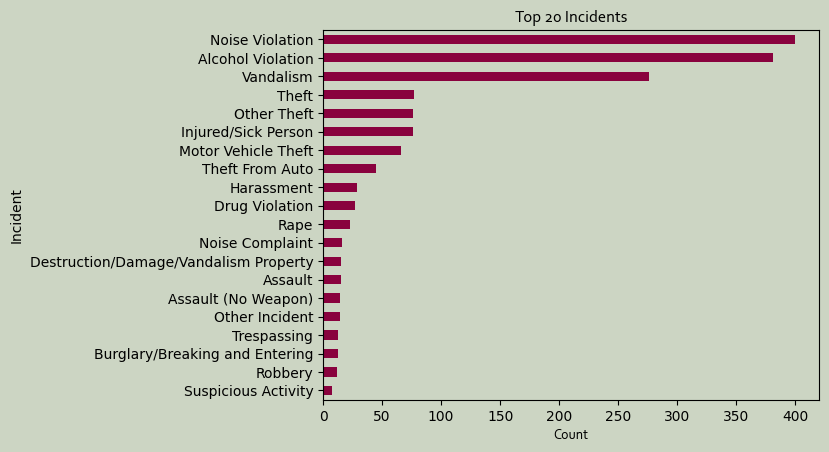

In [47]:
csfont = {'fontname':'Corbel'}
hfont = {'fontname':'Corbel'}
plt.figure(facecolor='#CCD5C3')
ax = plt.axes()
ax.set_facecolor("#CCD5C3")
plt.title('title',**csfont)
plt.xlabel('xlabel', **hfont)
df["Incident"].value_counts()[:20][::-1].plot(kind="barh", rot=0, xlabel="Count", title="Top 20 Incidents", color=['#89023E'])

In [60]:
df

,Time_of_Incident,Time_of_report,Incident,Location
0,2016-01-08 07:00:00,2016-12-20,Sex Offense,7100 Blk Preinkert Drive
1,2016-01-21 04:00:00,2017-03-03,Vandalism,South Campus Commons
2,2016-01-22 18:00:00,2017-03-03,Alcohol Violation,Wicomico Hall
3,2016-01-22 20:54:00,2017-03-03,Alcohol Violation,Easton Hall
4,2016-01-22 21:00:00,2017-03-03,Alcohol Violation,Ellicott Hall
...,...,...,...,...
1967,2023-09-29 18:00:00,2023-10-12,Theft From Auto,4200 Blk Knox Road
1968,2023-10-01 12:00:00,2023-10-12,Theft From Auto,4300 Blk Calvert Road
1969,2023-10-06 05:37:00,2023-10-12,Theft From Auto,9000 Blk Baltimore Avenue
1970,2023-10-06 23:00:00,2023-10-12,Theft From Auto,4300 Blk Hartwick Road


In [108]:
groups = df.groupby(['Incident'])

In [151]:
top_n = df["Incident"].value_counts()[:5]
top_n_list = list(top_n.index)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


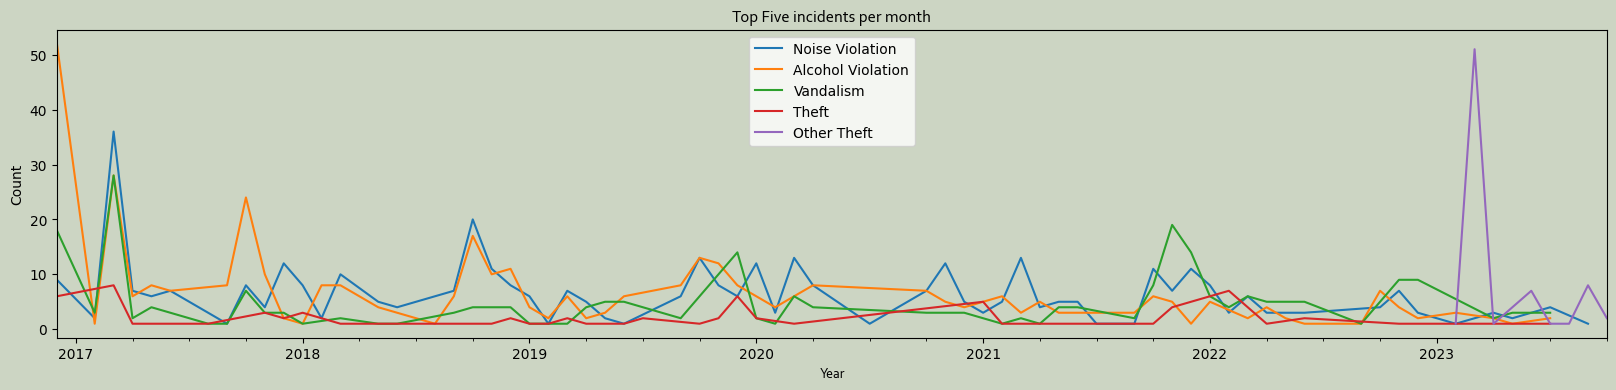

In [183]:
fig, ax = plt.subplots(figsize=(20,4))
csfont = {'fontname':'Corbel'}
hfont = {'fontname':'Corbel'}
plt.title('Top Five reports per month',**csfont)
plt.legend()
plt.ylabel("Count")
for incident in top_n_list:
    fig.set_facecolor("#CCD5C3")
    ax.set_facecolor("#CCD5C3") 
    data = groups.get_group(incident)["month_year"]
    freq = data.value_counts().sort_index()
    temp = freq.plot(label=incident)
    plt.xlabel('Year', **hfont)
plt.legend()

In [166]:
df.to_csv("crime_data.csv")

In [187]:
df.dtypes#-df["Time_of_report"]

Time_of_Incident            object
Time_of_report      datetime64[ns]
Incident                    object
Location                    object
year                         int64
month                        int64
month_year               period[M]
dtype: object